http://bit.ly/bream_smelt

# 데이터 전처리

### 넘파이로 데이터 준비하기

In [4]:
import numpy as np

In [5]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [7]:
fish_data = np.column_stack((fish_length, fish_weight))
print(fish_data)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


### 넘파이로 타겟 데이터 준비하기

In [10]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


### 사이킷런으로 훈련 데이터와 테스트 세트 나누기

In [12]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_data, train_target)
print(kn.score(train_data, train_target))
print(kn.score(test_data, test_target))

1.0
1.0


### 수상한 도미 한 마리 - 25cm , 150g 의 사례 확인하기

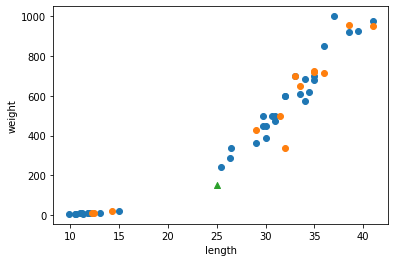

In [14]:
import matplotlib.pyplot as plt
plt.scatter(train_data[:,0], train_data[:,1])
plt.scatter(test_data[:,0], test_data[:,1])
plt.scatter(25,150, marker="^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [17]:
print(kn.predict([[25,150]]))

[0.]


### 수상한 사례의 이웃 5개를 확인하기

In [19]:
distances, indexes = kn.kneighbors([[25,150]])
print(distances)
print(indexes)

[[ 92.00086956 130.48375378 138.32150953 140.00603558 140.62090883]]
[[12 29  5 19  4]]


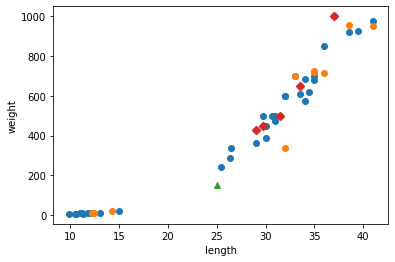

In [20]:
plt.scatter(train_data[:,0], train_data[:,1])
plt.scatter(test_data[:,0], test_data[:,1])
plt.scatter(25,150, marker="^")
plt.scatter(fish_data[indexes,0], fish_data[indexes,1], marker="D")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

### 수상한 사례의 이웃 5개의 정체를 판단하고 거리를 구하기

In [21]:
print(distances)
print(indexes)

[[ 92.00086956 130.48375378 138.32150953 140.00603558 140.62090883]]
[[12 29  5 19  4]]


In [25]:
print(fish_data[indexes])
print(fish_target[indexes])

[[[  31.5  500. ]
  [  37.  1000. ]
  [  29.7  450. ]
  [  33.5  650. ]
  [  29.   430. ]]]
[[1. 1. 1. 1. 1.]]


### 기준을 맞춰라 ( matplotlib의 x좌표 범위 맞추기`)

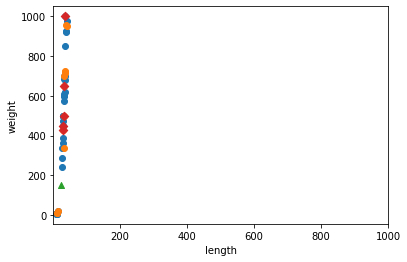

In [28]:
plt.scatter(train_data[:,0], train_data[:,1])
plt.scatter(test_data[:,0], test_data[:,1])
plt.scatter(25,150,marker="^")
plt.scatter(fish_data[indexes,0], fish_data[indexes,1], marker="D")
plt.xlim(1,1000)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

### 데이터 전처리 ( 평균, 표준점수 )

In [30]:
mean = np.mean(train_data, axis = 0)
std = np.std(train_data, axis = 0)

In [33]:
train_scaled = ( train_data - mean ) / std
test_scaled = ( test_data - mean ) / std
index_scaled = ( fish_data[indexes] - mean ) / std
input = ( [25, 150] - mean ) / std

### 전처리 데이터로 모델 훈련하기

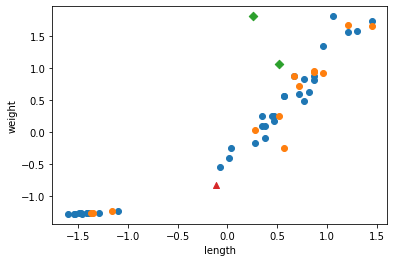

In [35]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(test_scaled[:, 0], test_scaled[:, 1])
plt.scatter(index_scaled[:, 0], index_scaled[:, 1], marker="D")
plt.scatter(input[0], input[1], marker="^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [40]:
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))
print(kn.predict([input]))

1.0
1.0
[1.]
